### Exploratory Data Analysis for Fathomnet Raw and Image Data

In [1]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
base_dir = '/Users/jaskiratkaur/Documents/ACV/Reef-madness/data/big_species/Annotations' 

In [3]:
species_image_count = {}

species_directories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

for species in species_directories:
    species_dir = os.path.join(base_dir, species)
    json_file = os.path.join(species_dir, 'dataset.json')
    if os.path.exists(json_file):
        with open(json_file) as file:
            data = json.load(file)
            images = data.get('images', [])
            species_image_count[species] = len(images)

# Convert to DataFrame for easier analysis
df_species_image_count = pd.DataFrame(list(species_image_count.items()), columns=['Species', 'ImageCount'])


In [4]:
df_species_image_count


,Species,ImageCount
0,Pennatulacea,1479
1,Porifera,2725
2,Hexactinellida,1758
3,Paragorgia_arborea,2117
4,Isididae,1912
5,Heterochone_calyx,1060
6,Heteropolypus_ritteri,1225


In [5]:
common_names = {'Pennatulacea': 'Sea Pens', 'Porifera': 'Sponges', 'Hexactinellida': 'Venus flower basket',
'Paragorgia_arborea': 'Bubblegum coral', 'Isididae': 'Bamboo coral', 'Heterochone_calyx': 'Fingered goblet sponge', 
'Heteropolypus_ritteri':  "Ritter's Soft Coral"}



### Plotting the species count in the data

/var/folders/1b/yw3h_ynn0pq2s09l1hw9zljw0000gn/T/ipykernel_13958/3486051002.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/1b/yw3h_ynn0pq2s09l1hw9zljw0000gn/T/ipykernel_13958/3486051002.py:14: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(


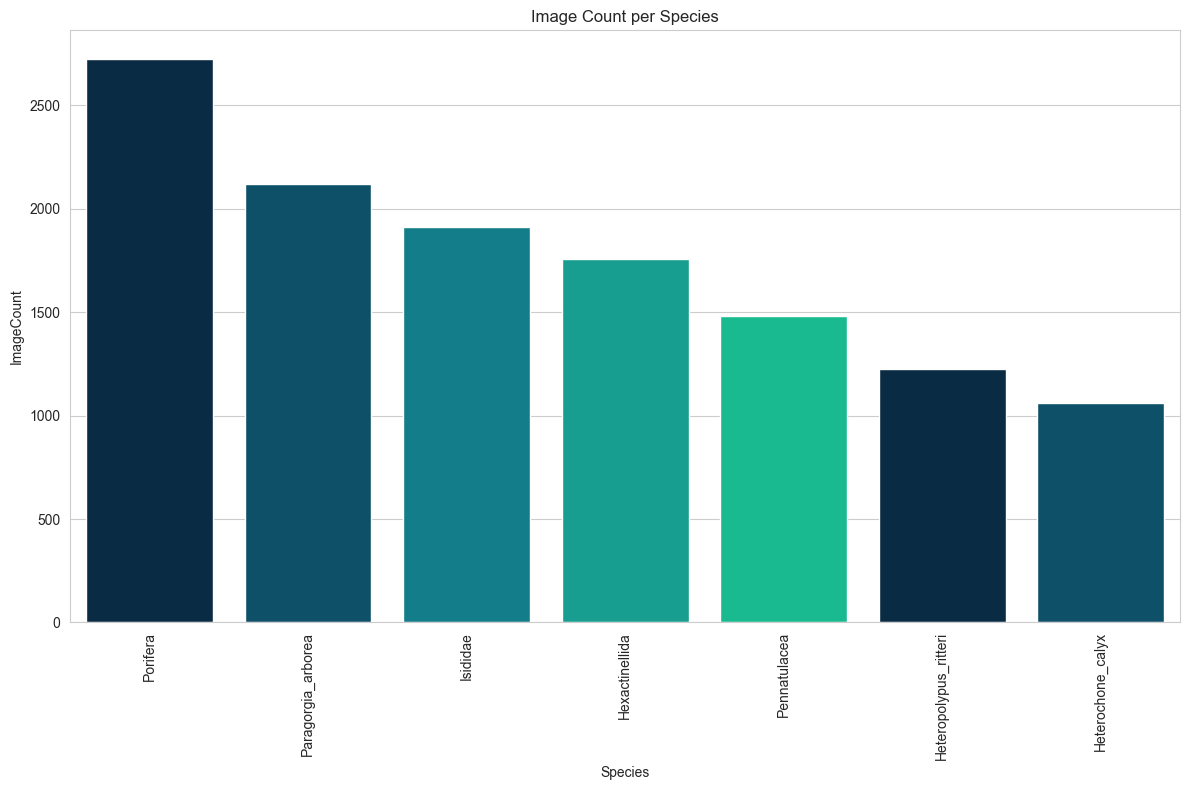

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# using a custom marine color pallette
marine_palette = [
    "#002D4C",  # Dark Blue
    "#005778",  # Medium Blue
    "#008C9E",  # Blue-Green
    "#00B4A2",  # Medium Green-Blue
    "#00D49D"   # Light Green-Blue
]

# Create the bar plot
plt.figure(figsize=(12, 8))  
barplot = sns.barplot(
    data=df_species_image_count.sort_values('ImageCount', ascending=False), 
    x='Species', 
    y='ImageCount', 
    palette=marine_palette
)

plt.xticks(rotation=90)

plt.title('Image Count per Species')
plt.tight_layout()
plt.show()


In [7]:
df_species_image_count

,Species,ImageCount
0,Pennatulacea,1479
1,Porifera,2725
2,Hexactinellida,1758
3,Paragorgia_arborea,2117
4,Isididae,1912
5,Heterochone_calyx,1060
6,Heteropolypus_ritteri,1225


The metadata is extracted from the Fathomnet API and was stored in json datasets for each species. We will first create one consolidated dataset for all species and then perform the EDA.

In [8]:
base_dir = '/Users/jaskiratkaur/Documents/ACV/Reef-madness/data/big_species/Annotations'  # Update with your directory

# Initialize a list to hold all metadata
all_metadata = []

# List all species directories
species_directories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Process each species' dataset
for species in species_directories:
    species_dir = os.path.join(base_dir, species)
    json_file = os.path.join(species_dir, 'dataset.json')
    if os.path.exists(json_file):
        with open(json_file) as file:
            data = json.load(file)
            # Extract each image's metadata
            for image in data.get('images', []):
                image['species'] = species  # Add the species name to the metadata
                all_metadata.append(image)

# Create a DataFrame with all metadata
df_metadata = pd.DataFrame(all_metadata)

# Save the DataFrame to a CSV file
output_csv = '/Users/jaskiratkaur/Documents/ACV/Reef-madness/data/big_species/metadata.csv'  
df_metadata.to_csv(output_csv, index=False)


In [9]:
metadata = pd.read_csv('/Users/jaskiratkaur/Documents/ACV/Reef-madness/data/big_species/metadata.csv')

In [10]:
metadata.head()

,id,width,height,file_name,license,flickr_url,coco_url,date_captured,species
0,1,1920,1080,f8c5742b-d13c-450e-8998-cb2337490c27.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,NaN,Pennatulacea
1,2,720,368,d34aff0a-c7fe-41e4-be69-a89f61e079ed.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,NaN,Pennatulacea
2,3,1920,1080,c9e1edf4-7a7c-4cef-8541-ff57bfc76f05.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,NaN,Pennatulacea
3,4,715,486,13964d12-bf3e-41b3-aee4-9bfcebd943bf.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,NaN,Pennatulacea
4,5,1920,1080,d86eb182-0263-4ce9-9d7b-7dfe7f6cda32.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,NaN,Pennatulacea


### Missing Values

In [11]:
# percentage of missing values in each column
missing_values = metadata.isnull().mean() * 100
missing_values


id               0.000000
width            0.000000
height           0.000000
file_name        0.000000
license          0.000000
flickr_url       0.000000
coco_url         0.000000
date_captured    1.099707
species          0.000000
dtype: float64

The data is fairly complete with a only 1% missing values in the "date_captured" column. Looking up the species of these missing values.

In [12]:
# species for missing "date_captured" column
missing_date_captured = metadata[metadata['date_captured'].isnull()]['species'].value_counts()
missing_date_captured

species
Hexactinellida           78
Pennatulacea             19
Porifera                 17
Isididae                 11
Heteropolypus_ritteri     8
Paragorgia_arborea        2
Name: count, dtype: int64

Since we have only have a few missing values, we can drop these rows.

In [13]:
# dropping rows with missing values
metadata = metadata.dropna(subset=['date_captured'])

### Capturing the date

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming metadata is your main DataFrame with 'date_captured', 'species', and other metadata

# Convert 'date_captured' to datetime
metadata['date_captured'] = pd.to_datetime(metadata['date_captured'])

# Group by species and date and count the images
grouped = metadata.groupby(['species', metadata['date_captured'].dt.date]).size().reset_index(name='image_count')

# Now grouped contains the number of images for each species on each date
#

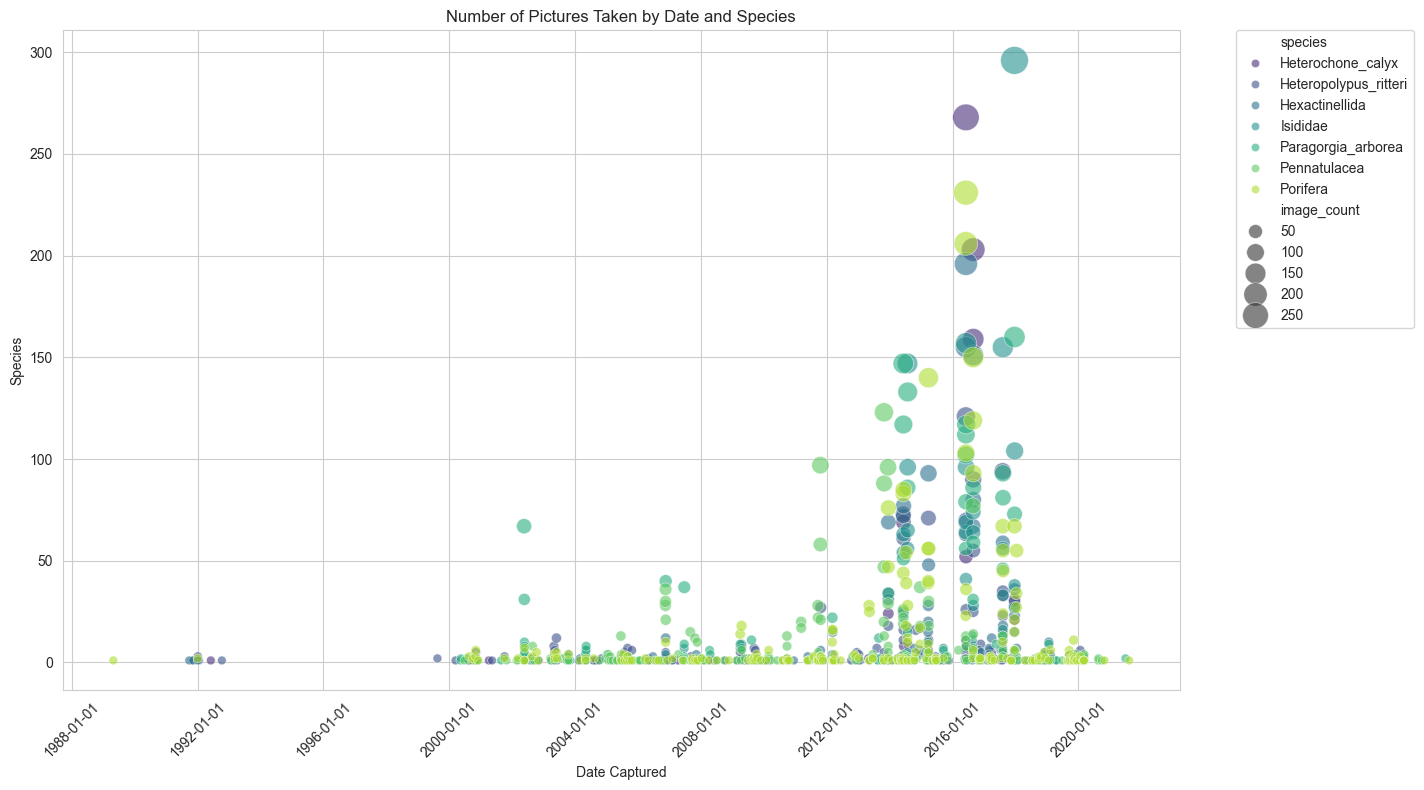

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(
    data=grouped,
    x='date_captured',
    y='image_count',
    size='image_count', 
    hue='species',       
    palette='viridis',   
    sizes=(40, 400),
    alpha=0.6
)

# Format the date on the x-axis
scatterplot.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Set the plot title and labels
plt.title('Number of Pictures Taken by Date and Species')
plt.xlabel('Date Captured')
plt.ylabel('Species')

# Optimize layout
plt.tight_layout()

# Show a legend with the size meaning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


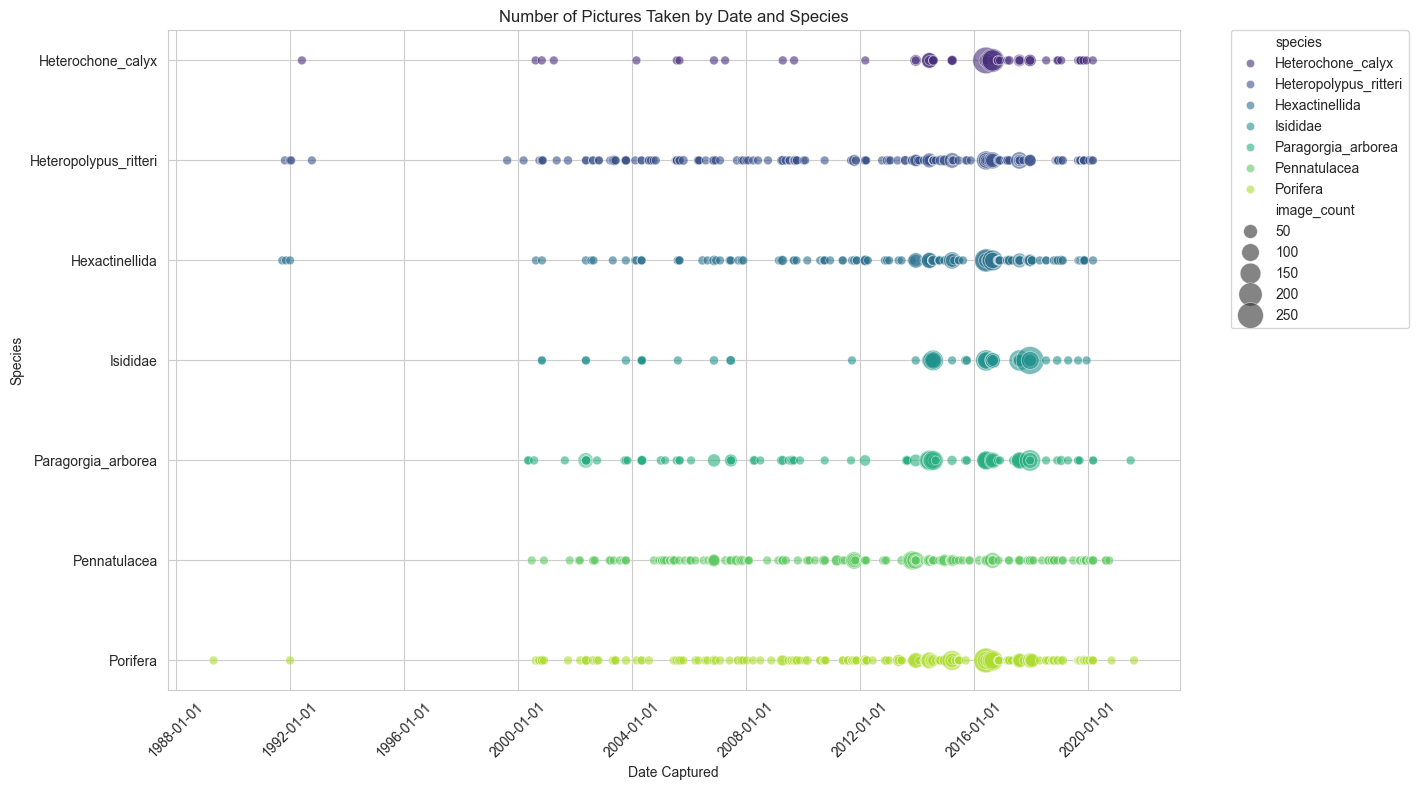

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(
    data=grouped,
    x='date_captured',
    y='species',
    size='image_count', 
    hue='species',       
    palette='viridis',   
    sizes=(40, 400),
    alpha=0.6
)

# Format the date on the x-axis
scatterplot.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Set the plot title and labels
plt.title('Number of Pictures Taken by Date and Species')
plt.xlabel('Date Captured')
plt.ylabel('Species')

# Optimize layout
plt.tight_layout()

# Show a legend with the size meaning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()

In [17]:
import pandas as pd

# Calculate descriptive statistics for 'width'
width_stats = metadata['width'].describe()

# Calculate descriptive statistics for 'height'
height_stats = metadata['height'].describe()

# Display the statistics
print("Descriptive Statistics for Image Width:")
print(width_stats)
print("\nDescriptive Statistics for Image Height:")
print(height_stats)


Descriptive Statistics for Image Width:
count    12141.0000
mean      1717.3106
std        450.2178
min        620.0000
25%       1920.0000
50%       1920.0000
75%       1920.0000
max       1920.0000
Name: width, dtype: float64

Descriptive Statistics for Image Height:
count    12141.000000
mean       975.268100
std        233.927998
min        366.000000
25%       1080.000000
50%       1080.000000
75%       1080.000000
max       1080.000000
Name: height, dtype: float64


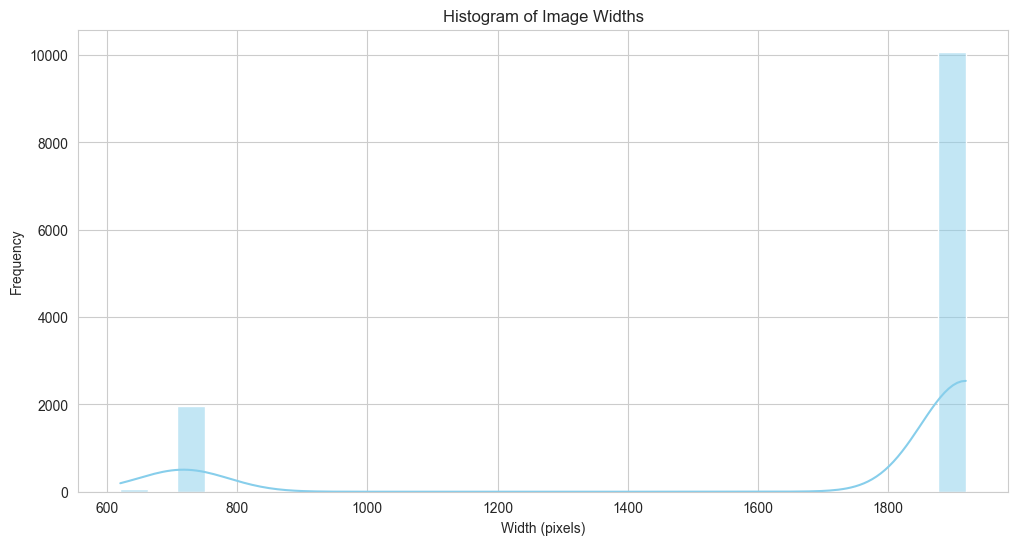

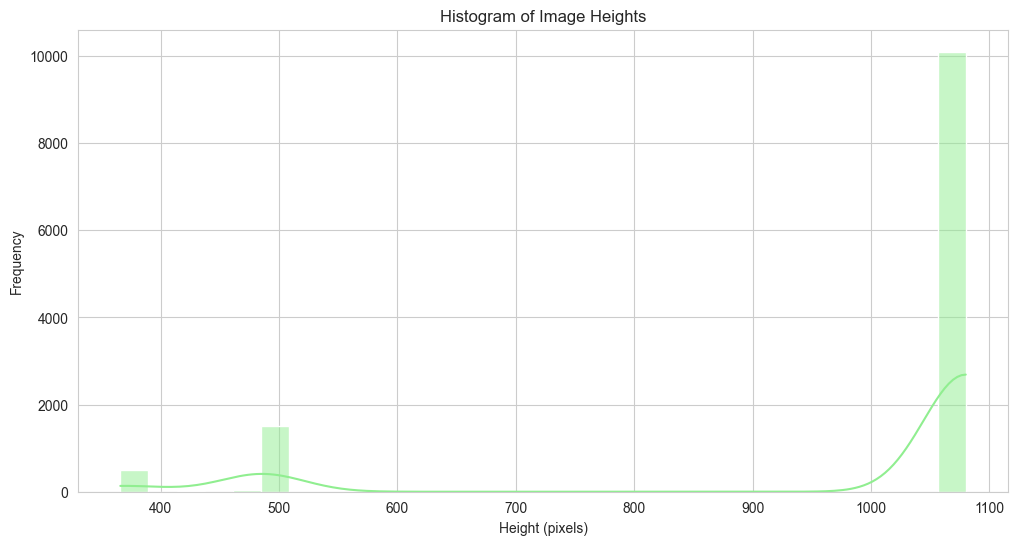

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'metadata' is a DataFrame with your image data, and it includes 'width' and 'height' columns.

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histogram for image widths
plt.figure(figsize=(12, 6))
sns.histplot(metadata['width'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.show()

# Histogram for image heights
plt.figure(figsize=(12, 6))
sns.histplot(metadata['height'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.show()


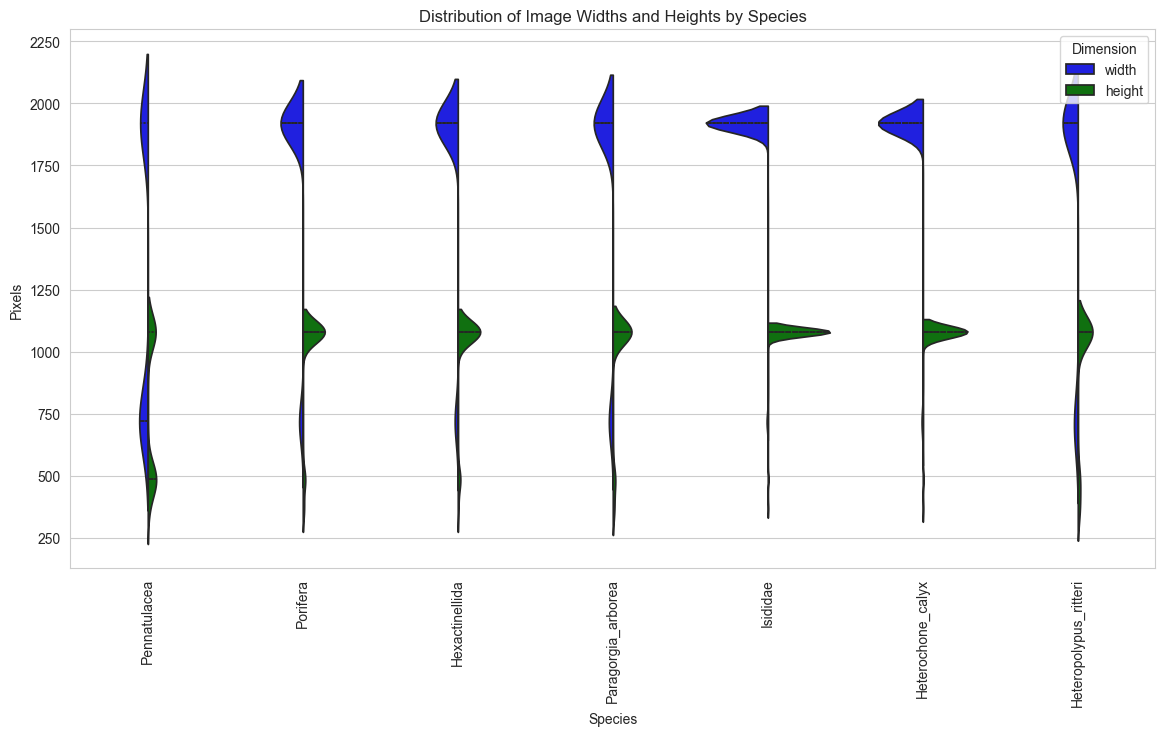

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'metadata' is your DataFrame and it contains 'width', 'height', and 'species'

# Melt the DataFrame to make 'width' and 'height' fall under a single column
melted_data = pd.melt(metadata, id_vars='species', value_vars=['width', 'height'], var_name='dimension', value_name='value')

# Set the figure size
plt.figure(figsize=(14, 7))

# Create violin plots
sns.violinplot(x='species', y='value', hue='dimension', data=melted_data, split=True, 
            palette={'width': 'b', 'height': 'g'}, inner='quartile')

# Customize the plot
plt.title('Distribution of Image Widths and Heights by Species')
plt.xticks(rotation=90)  # Rotate the species names for better readability
plt.xlabel('Species')
plt.ylabel('Pixels')
plt.legend(title='Dimension')

# Display the plot
plt.show()


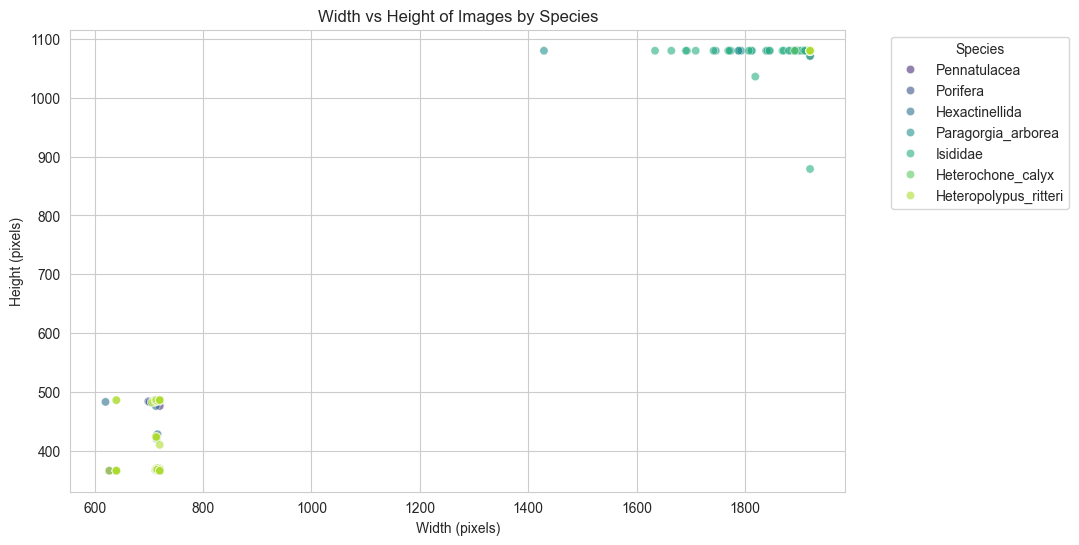

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot of width vs height, colored by species
sns.scatterplot(x='width', y='height', hue='species', data=metadata, palette='viridis', alpha=0.6)

# Customize the plot
plt.title('Width vs Height of Images by Species')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc=2)

# Show the plot
plt.show()


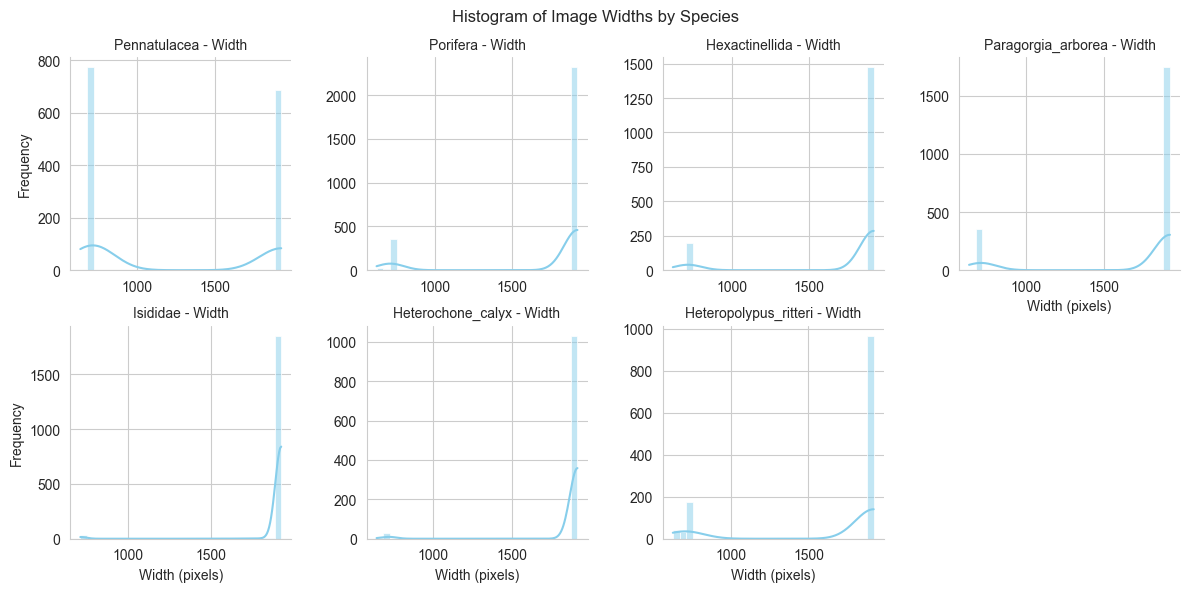

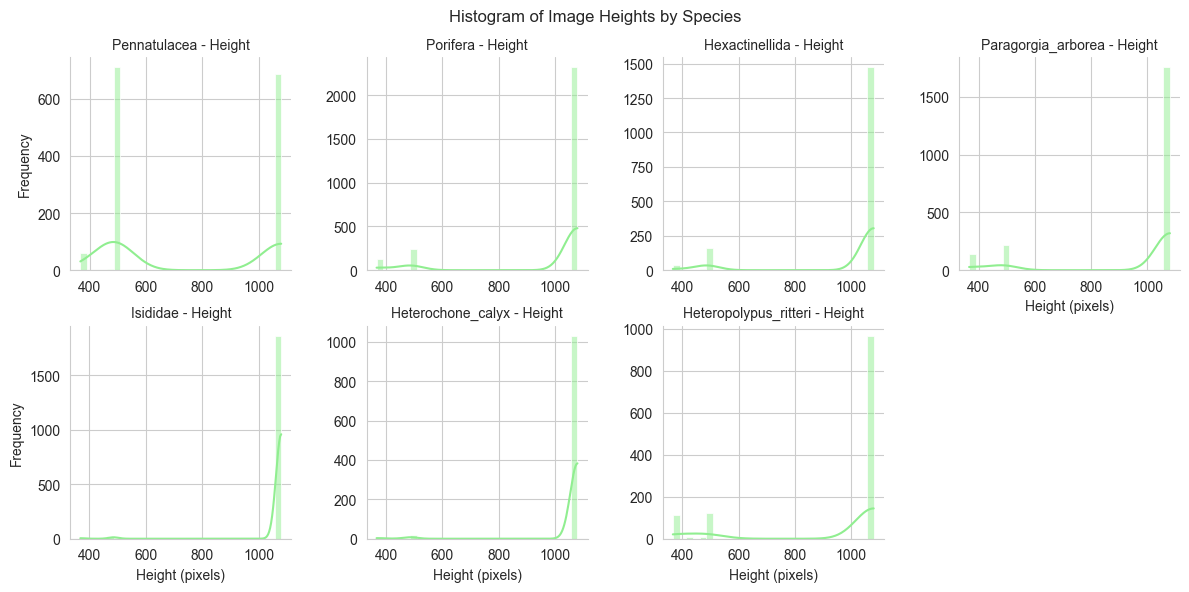

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'metadata' is your DataFrame and it contains 'width', 'height', and 'species'

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a grid of histograms for image widths by species
g_width = sns.FacetGrid(metadata, col='species', col_wrap=4, height=3, sharex=False, sharey=False)
g_width.map(sns.histplot, 'width', color='skyblue', bins=30, kde=True)
g_width.set_titles('{col_name} - Width')
g_width.set_xlabels('Width (pixels)')
g_width.set_ylabels('Frequency')
plt.subplots_adjust(top=0.9)
g_width.fig.suptitle('Histogram of Image Widths by Species')  # Adjust the main title
plt.show()

# Create a grid of histograms for image heights by species
g_height = sns.FacetGrid(metadata, col='species', col_wrap=4, height=3, sharex=False, sharey=False)
g_height.map(sns.histplot, 'height', color='lightgreen', bins=30, kde=True)
g_height.set_titles('{col_name} - Height')
g_height.set_xlabels('Height (pixels)')
g_height.set_ylabels('Frequency')
plt.subplots_adjust(top=0.9)
g_height.fig.suptitle('Histogram of Image Heights by Species')  # Adjust the main title
plt.show()


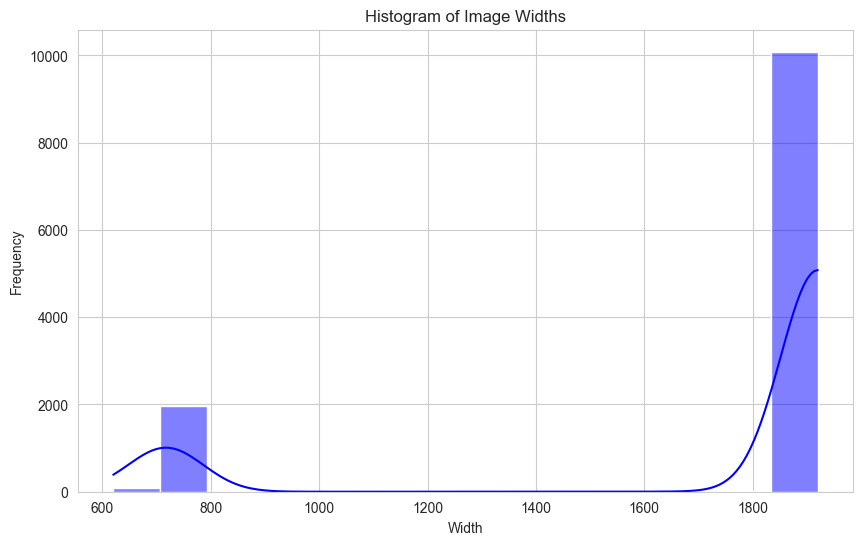

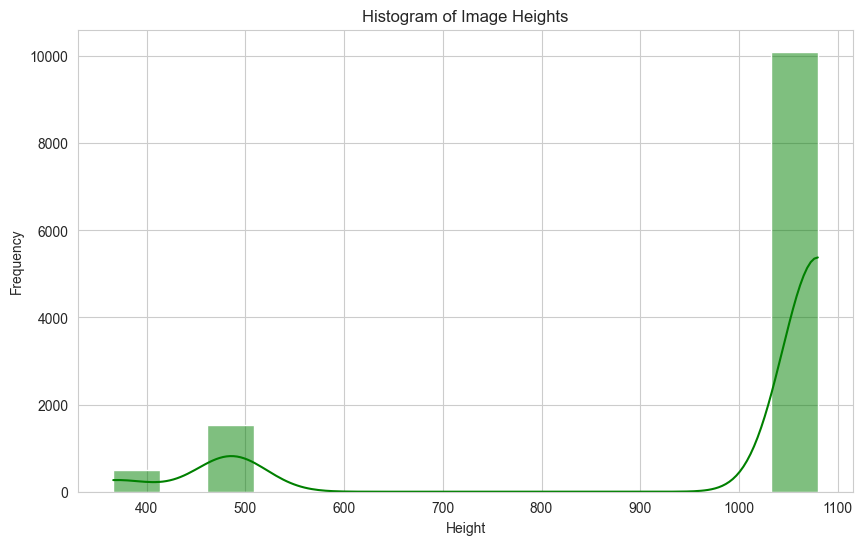

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'metadata' DataFrame contains 'width' and 'height' columns
# Histogram of image widths
plt.figure(figsize=(10, 6))
sns.histplot(metadata['width'], kde=True, color='blue')
plt.title('Histogram of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

# Histogram of image heights
plt.figure(figsize=(10, 6))
sns.histplot(metadata['height'], kde=True, color='green')
plt.title('Histogram of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


### Loading sample images

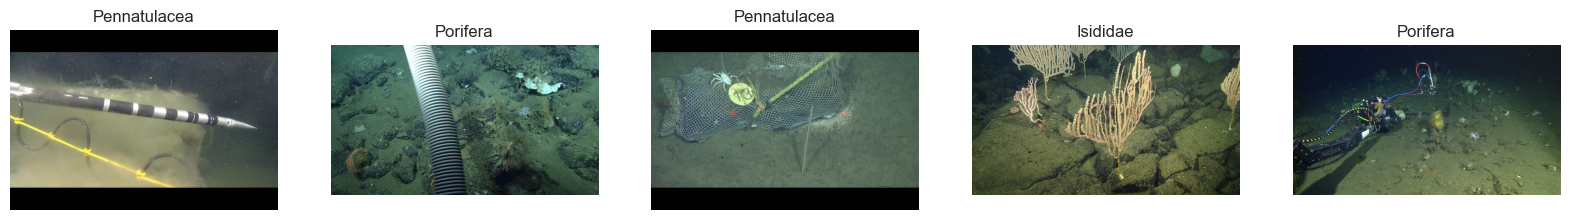

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import os

base_dir = '/Users/jaskiratkaur/Documents/ACV/Reef-madness/data/big_species/JPEGImages'

# Sample some images
sample_images = metadata.sample(5)  # Adjust number of samples as needed

plt.figure(figsize=(20, 10))
# Use a simple counter to handle subplot indices correctly
for idx, (i, row) in enumerate(sample_images.iterrows(), start=1):
    # Construct the path to the image file
    image_path = os.path.join(base_dir, row['species'], row['file_name'])
    if os.path.exists(image_path):  # Check if the file exists
        img = Image.open(image_path)
        plt.subplot(1, 5, idx)  # Use idx which starts from 1 and goes up to 5
        plt.imshow(img)
        plt.axis('off')
        plt.title(row['species'])  # Optionally add the species as the title of each subplot
    else:
        print(f"File not found: {image_path}")  # Print a message if the file is not found
plt.show()


In [24]:
# Outlier detection based on image dimensions
Q1 = metadata['width'].quantile(0.25)
Q3 = metadata['width'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = metadata[(metadata['width'] < lower_bound) | (metadata['width'] > upper_bound)]

# Show some outliers
print("Outliers based on width:")
print(outliers)


Outliers based on width:
        id  width  height                                 file_name  license  \
19      20    714     486  6839bdf5-8867-4140-a4b6-4f8ad2adca88.png        0   
20      21    720     486  4c0e3597-bbba-4ba8-b35d-7e3979f15a61.png        0   
21      22    720     486  a0f5f8d7-3027-4758-9a6c-40153e59b2b2.png        0   
22      23    714     484  259ca2f6-c665-4919-9da3-0b341b1613eb.png        0   
23      24    714     486  5e33854e-ff2d-4cb3-85cb-b9676063e732.png        0   
...    ...    ...     ...                                       ...      ...   
11332  282    720     486  59cde54d-1140-4eb1-91bf-96a868b1fe8b.png        0   
11333  283    720     486  c6ad4f6e-42a0-450b-b7e1-46fdc0f9cd44.png        0   
11334  284    720     486  78508a5f-a6d7-4476-8add-d2d6ba8489a6.png        0   
11335  285    720     486  9bba79f7-11a3-426c-883e-34381974b230.png        0   
11336  286    720     486  f6073be1-5b4b-4075-9049-fafa2c5762ae.png        0   

              

Since we are not marine biologists, we will add a column for the common name of the species in the metadata.

In [25]:
common_names = {'Pennatulacea': 'Sea Pens', 'Porifera': 'Sponges', 'Hexactinellida': 'Venus flower basket',
'Paragorgia_arborea': 'Bubblegum coral', 'Isididae': 'Bamboo coral', 'Heterochone_calyx': 'Fingered goblet sponge', 
'Heteropolypus_ritteri':  "Ritter's Soft Coral"}

# Add a column for the common names
metadata['common_name'] = metadata['species'].map(common_names)

In [27]:
import sys
sys.path.append('../src/scripts')
from utils import plot_depth_histogram

unique_species = metadata['species'].unique()

for species in unique_species:
    plot_depth_histogram(species)

INFO:root:Found 1479 images of Pennatulacea


INFO:root:Found 2725 images of Porifera


INFO:root:Found 1758 images of Hexactinellida


INFO:root:Found 2117 images of Paragorgia_arborea


INFO:root:Found 1912 images of Isididae


INFO:root:Found 1060 images of Heterochone_calyx


INFO:root:Found 1225 images of Heteropolypus_ritteri


In [28]:
sys.path.append('../src/scripts')
from utils import plot_location_heatmap
from fathomnet.api import images
from ipyleaflet import Map, Heatmap, basemaps

for species in unique_species:
    heatmap_map = plot_location_heatmap(species)
    display(heatmap_map)

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Map(center=[36.807, -121.988], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…